# Solving PDEs with FEniCS using Standard Combination Technique

## 2D Poisson Equation
In this example we are using Poisson function wich defines a 2D Poisson equation over a square domain with Dirichlet boundary conditions


 \begin{equation}
  \begin{split}
   -\nabla^2 u =f,\; \,in\,\Omega,\\
   u=u_D,\; \,on\,\delta\Omega.
  \end{split}
 \end{equation}

 Lets define boundary values u_D and right hand side f to be:
 \begin{equation}
  u_D(x) = 1 + x_0^2 + x_1^2, \\
  f(x) = -6.
 \end{equation}
 


0 [1, 4] 1.0
1 [2, 3] 1.0
2 [3, 2] 1.0
3 [4, 1] 1.0
4 [1, 3] -1.0
5 [2, 2] -1.0
6 [3, 1] -1.0
CombiSolution [[1.         1.00390625 1.015625   1.03515625 1.0625     1.09765625
  1.140625   1.19140625 1.25       1.31640625 1.390625   1.47265625
  1.5625     1.66015625 1.765625   1.87890625 2.        ]
 [1.0078125  1.01171875 1.0234375  1.04296875 1.0703125  1.10546875
  1.1484375  1.19921875 1.2578125  1.32421875 1.3984375  1.48046875
  1.5703125  1.66796875 1.7734375  1.88671875 2.0078125 ]
 [1.03125    1.03515625 1.046875   1.06640625 1.09375    1.12890625
  1.171875   1.22265625 1.28125    1.34765625 1.421875   1.50390625
  1.59375    1.69140625 1.796875   1.91015625 2.03125   ]
 [1.0703125  1.07421875 1.0859375  1.10546875 1.1328125  1.16796875
  1.2109375  1.26171875 1.3203125  1.38671875 1.4609375  1.54296875
  1.6328125  1.73046875 1.8359375  1.94921875 2.0703125 ]
 [1.125      1.12890625 1.140625   1.16015625 1.1875     1.22265625
  1.265625   1.31640625 1.375      1.44140625 1.

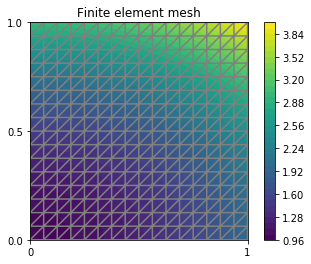

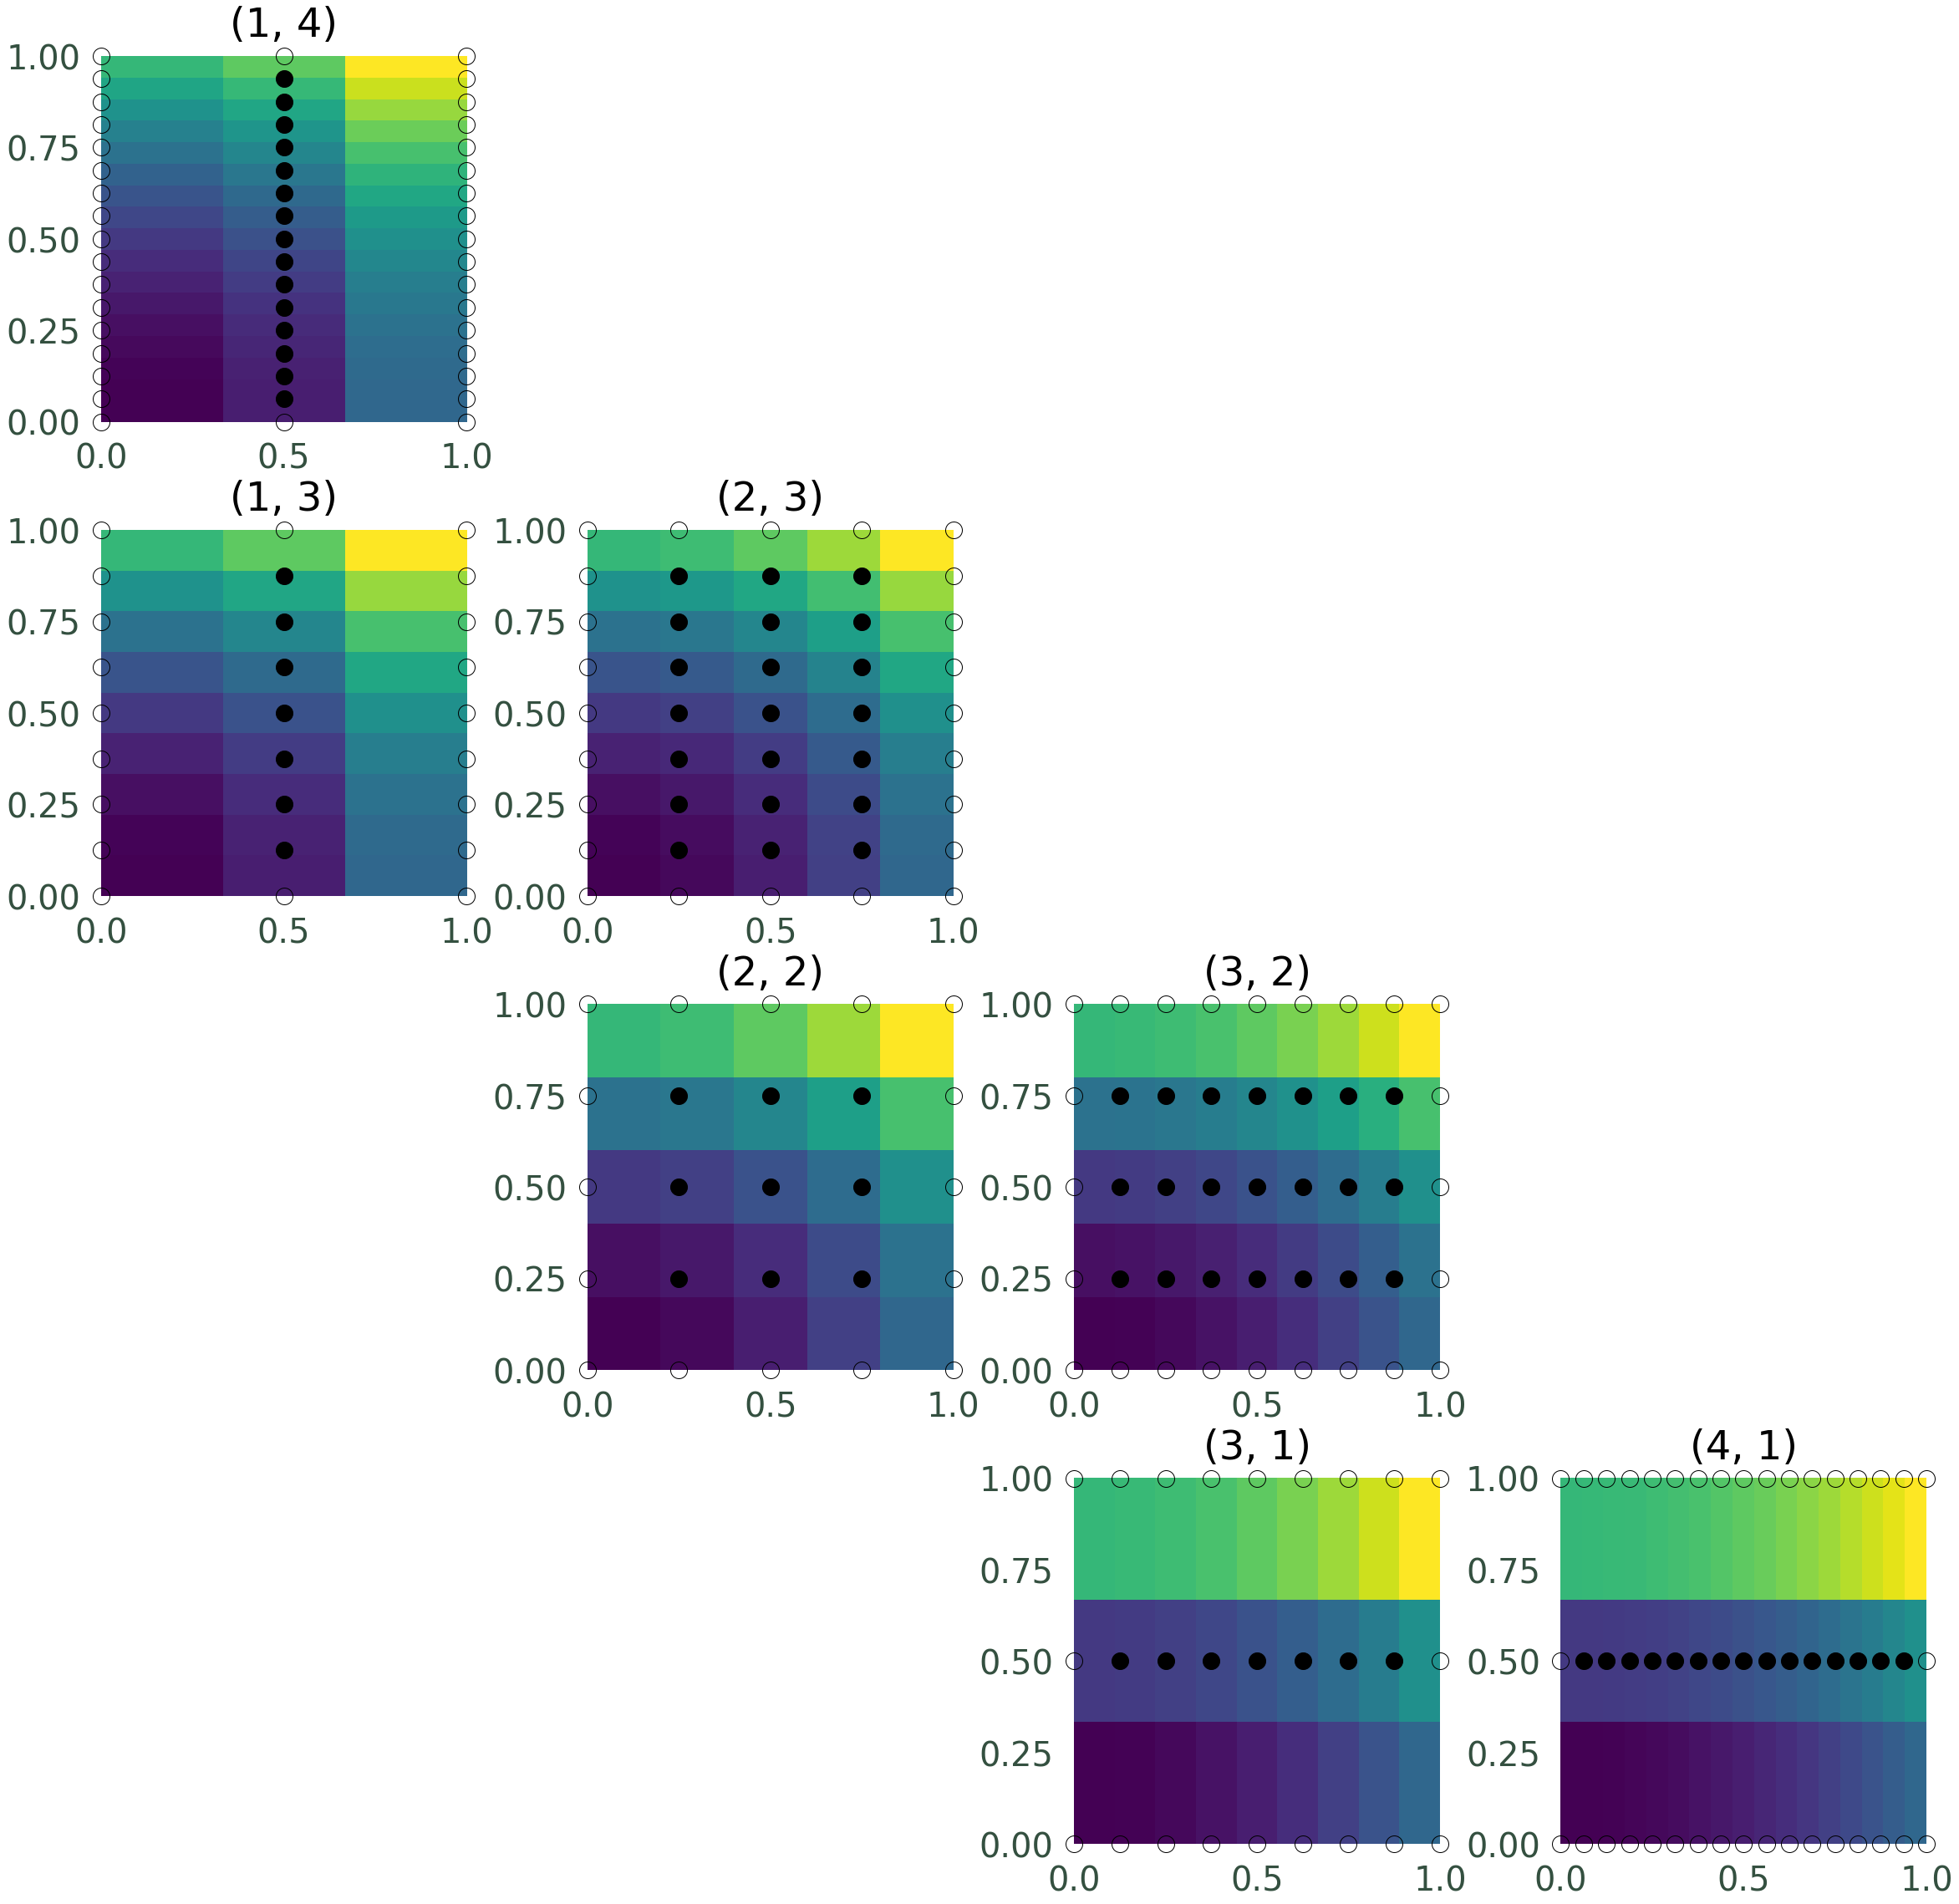

Sparse Grid:


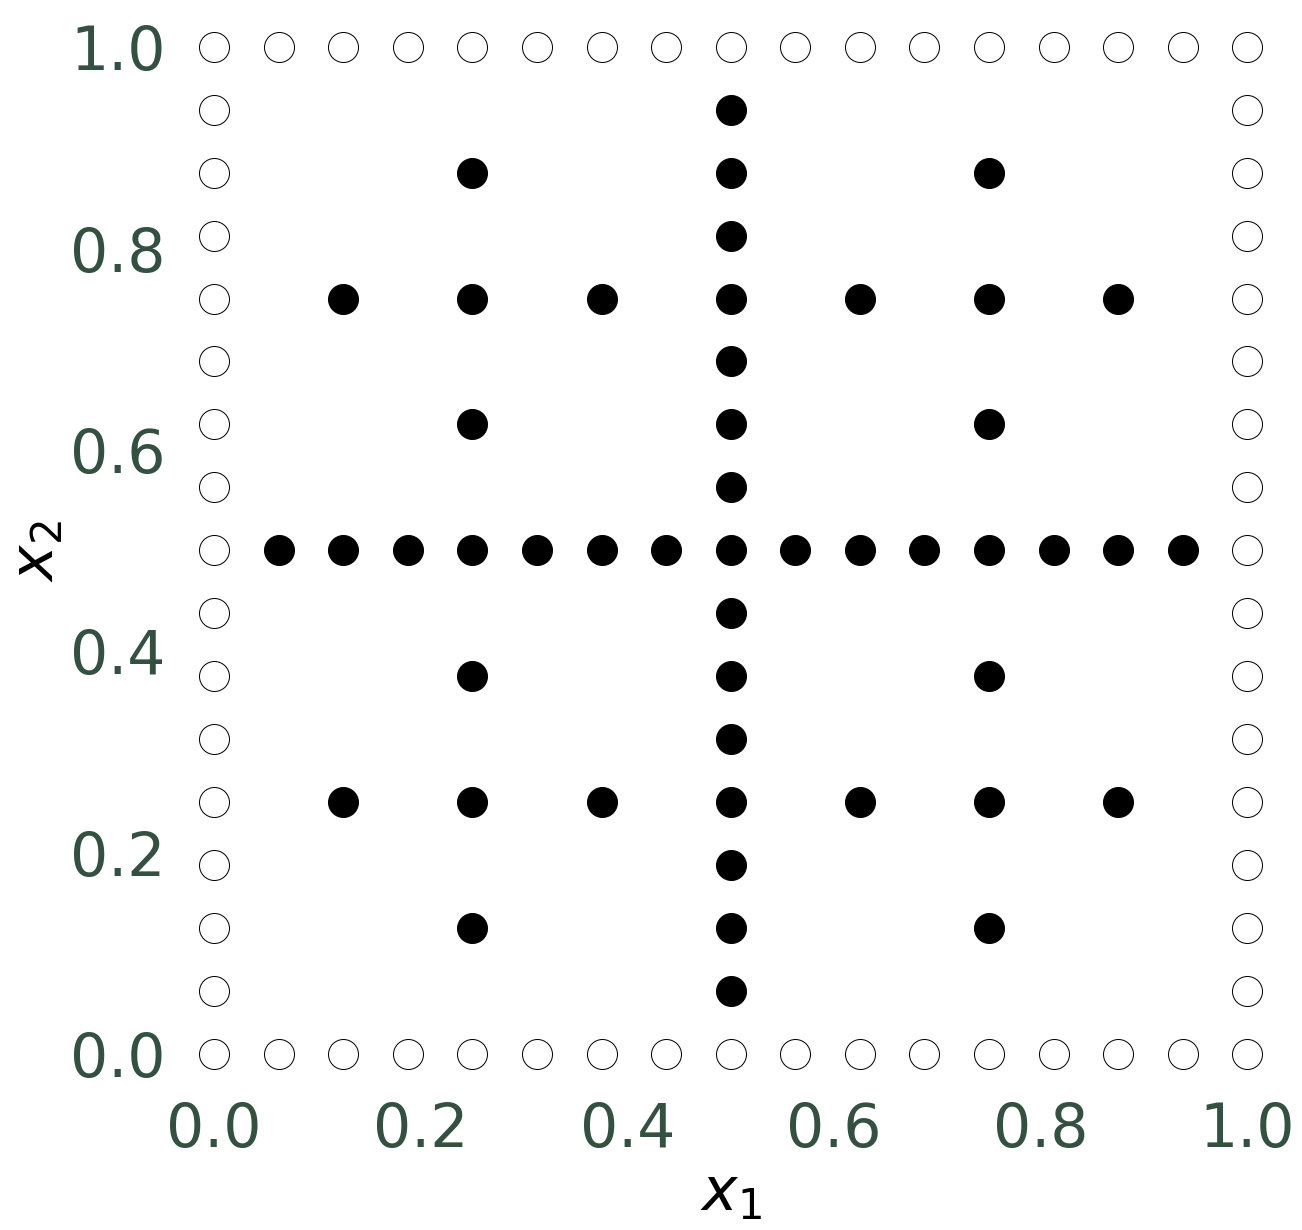

Combi result:
Relative error:


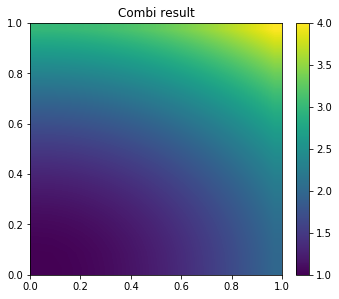

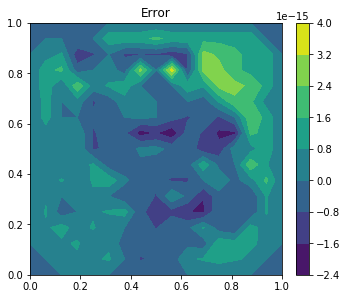

In [4]:
%matplotlib inline
from sys import path
path.append('../src/')
path.append('../PDE')

from fenics import *
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

from StandardCombi import *
from GridOperation import *
from ComponentGridInfo import *
from PDE_Solver import *


# Grid setup
dim = 2
a = np.zeros(dim)
b = np.ones(dim)
grid = TrapezoidalGrid(a=a, b=b, boundary=True) # always use boundaries with PDE framework
minimum_level = 1
maximum_level = 4
maxlv = tuple(maximum_level*np.ones(dim, dtype=int))
grid.setCurrentArea(a,b,maxlv)

# Model setup
poisson2D = Poisson('-6.0', 1, '1 + x[0]*x[0] + 2*x[1]*x[1]', 2, '1 + x[0]*x[0] + 2*x[1]*x[1]', 2)

# Reference solution
poisson2D.define_rectangle_mesh(a,b, *(len(n) for n in grid.get_coordinates()))
reference_solution = poisson2D.solve()
poisson2D.plot_solution()
poisson2D.plot_mesh()


# Combi setup and solution
operation = PDE_Solve(solver=poisson2D, dim=dim, grid=grid, reference_solution=reference_solution)
combiObject = StandardCombi(a, b, operation=operation)
combiObject.perform_operation(minimum_level, maximum_level)

#Results
print("Combi scheme:")
combiObject.print_resulting_combi_scheme(operation=operation)
print("Sparse Grid:")
combiObject.print_resulting_sparsegrid()
print("Combi result:")
operation.plot_combi_solution()
print("Relative error:")
operation.plot_error()

## Instationary heat equation 
In this example we are using instationary Poisson equation, describing diffusion of a Gaussian Hill in a square domain with Dirichlet boundary conditions


 \begin{equation}
  \begin{split}
   \frac{du}{dt} = \nabla u + f \; in\ \Omega,\\
    u=u_D,\; \,on\,\delta\Omega \\
    u=u_0,\; \,at \ \,t=0.
  \end{split}
 \end{equation}

 with:
 \begin{equation}
  u_D(x,y) = f(x,y) = 0 \\
  u_0(x,y) = e^{-5x^2} + e^{-5y^2}
 \end{equation}

Combi scheme:


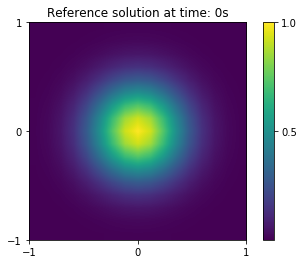

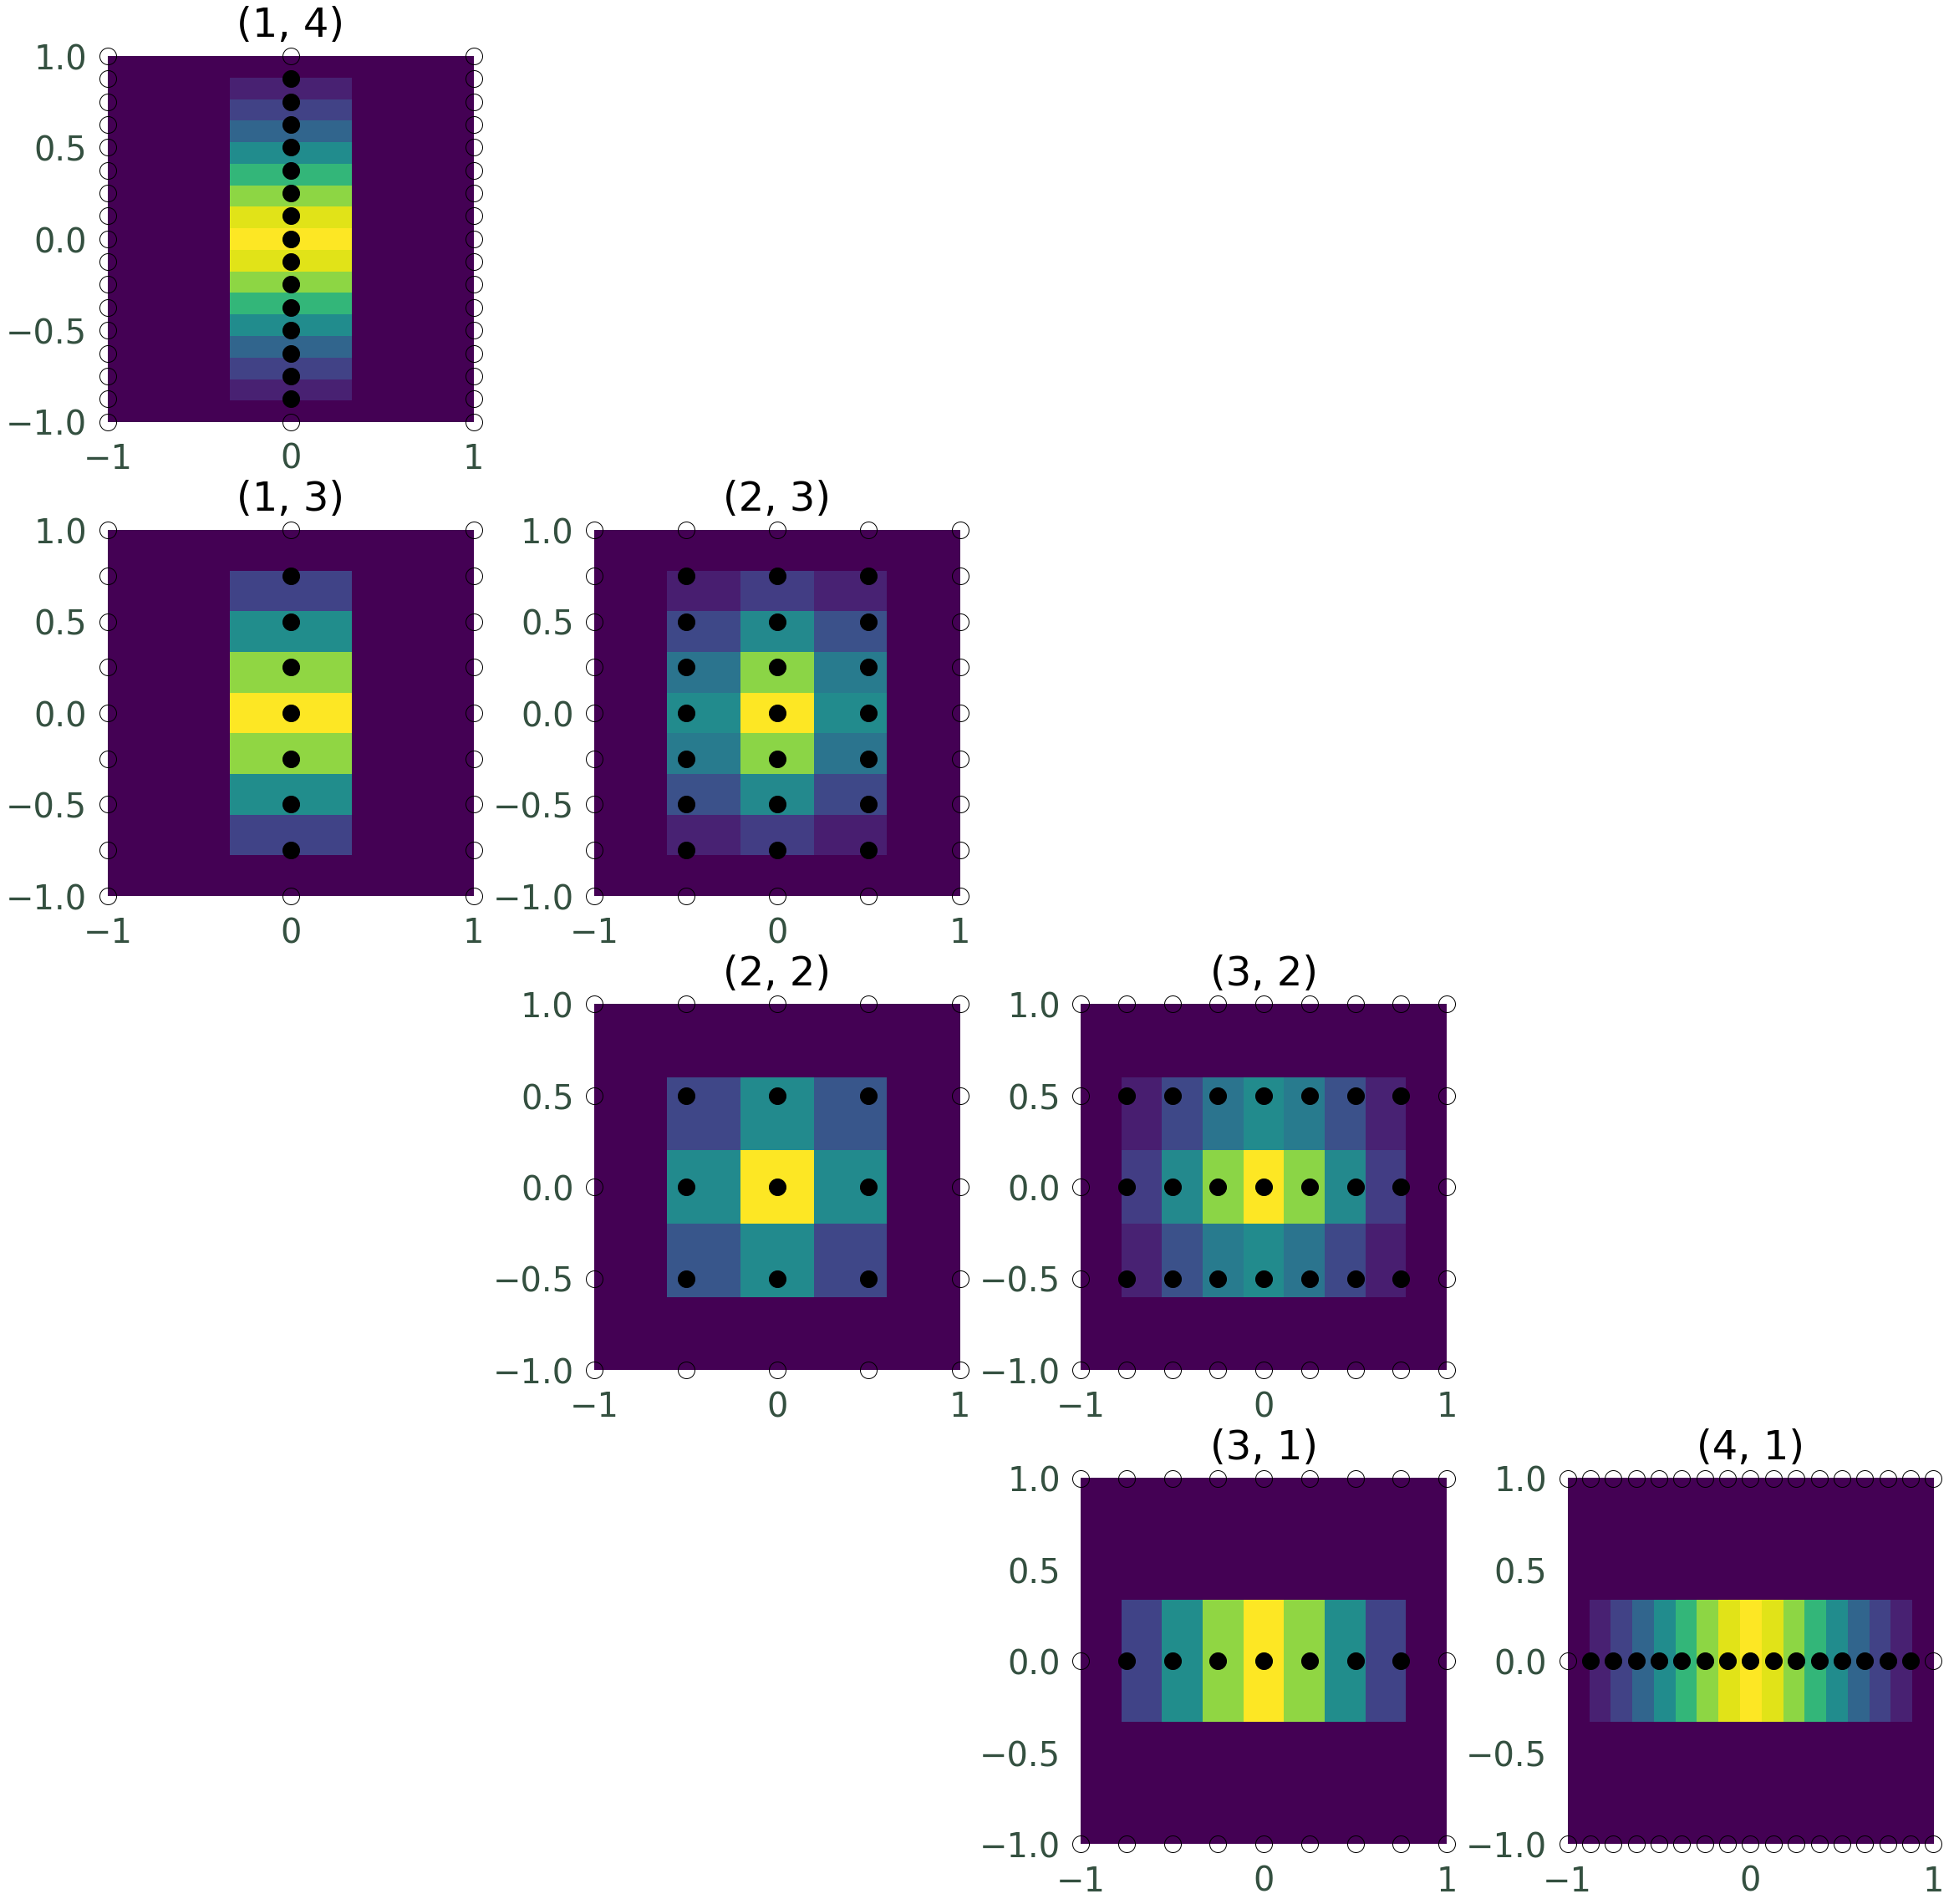

Sparse Grid:
Combi result:
Relative error:


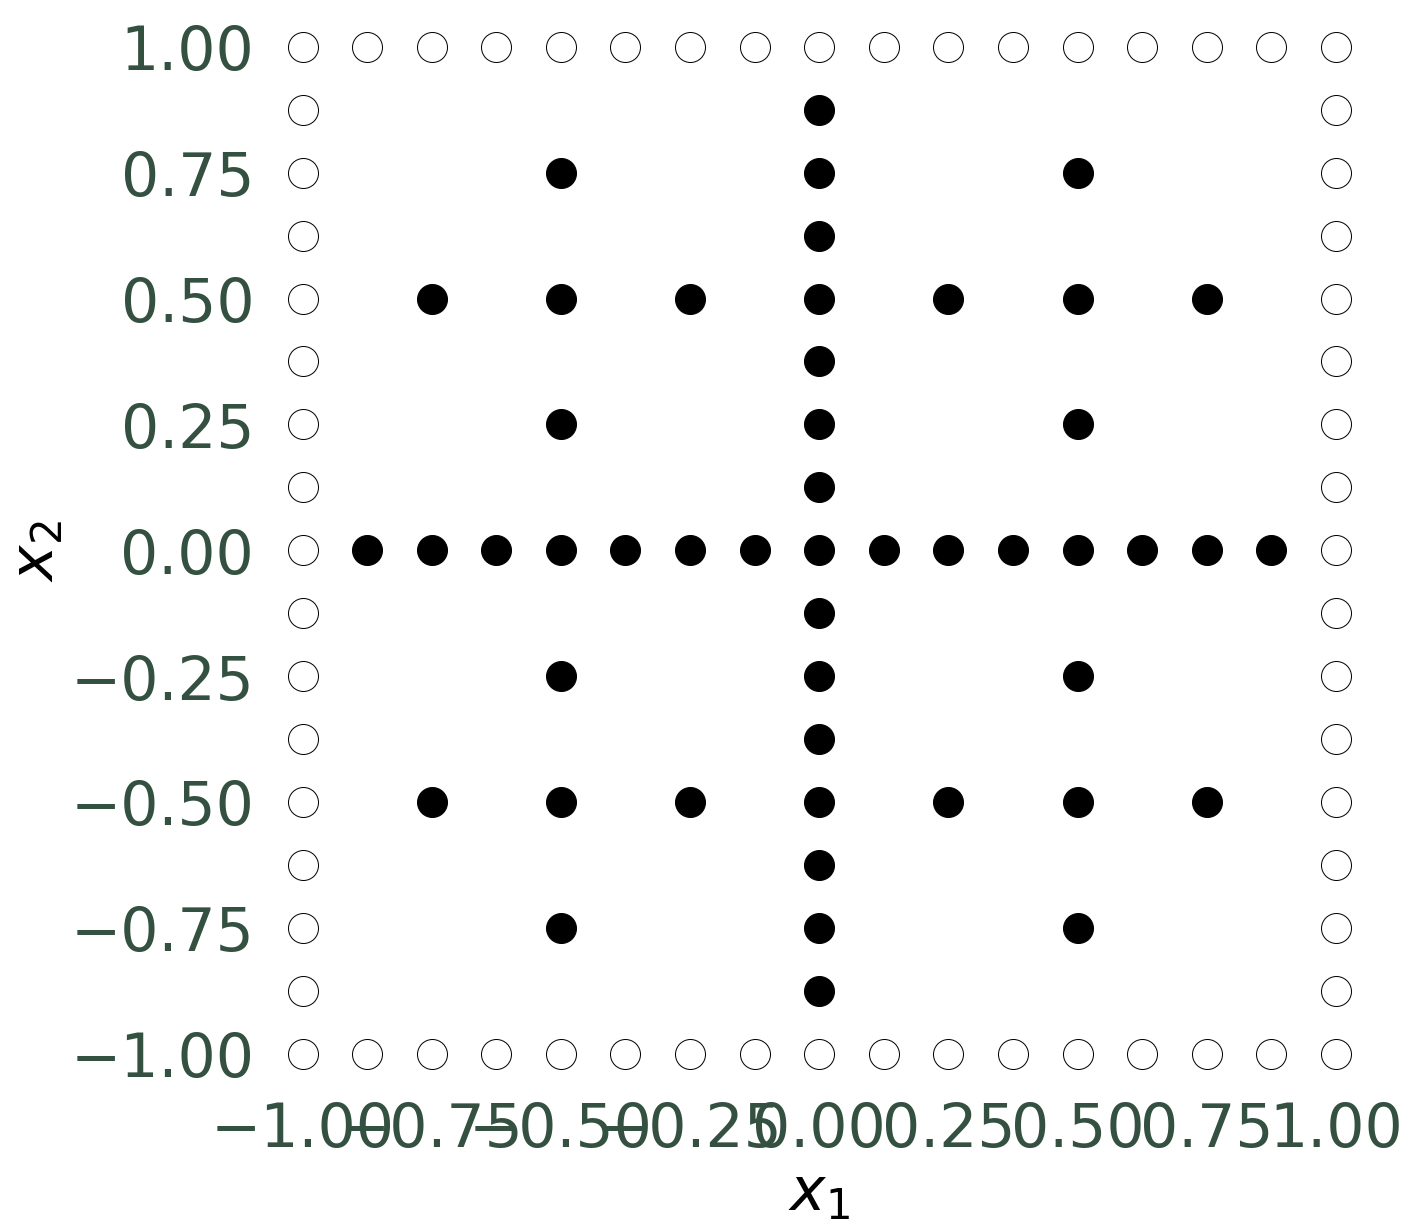

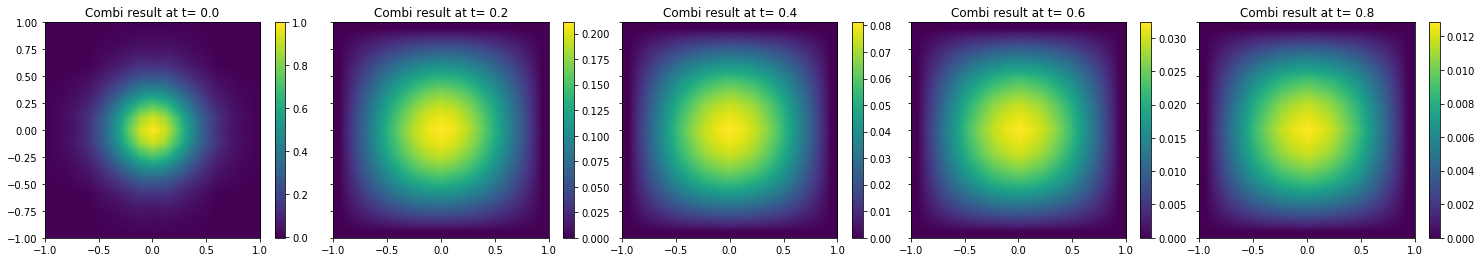

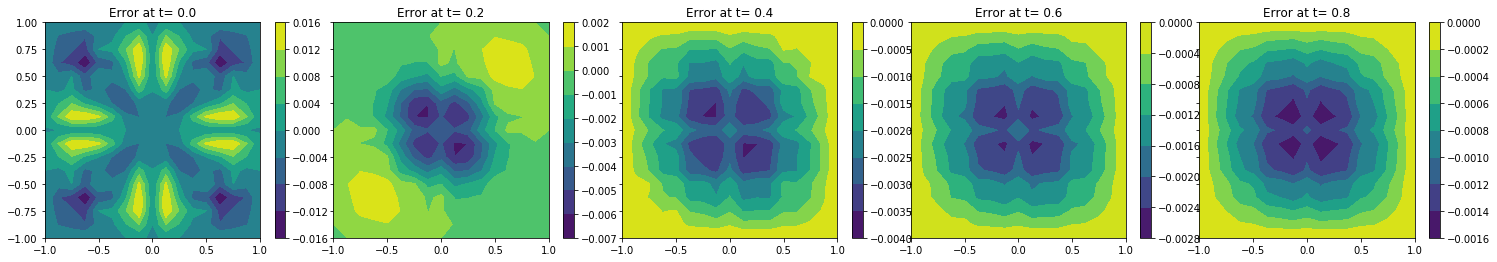

In [1]:
%matplotlib inline
from sys import path
path.append('../src/')
path.append('../PDE')

from fenics import *
import matplotlib.pyplot as plt
import numpy as np

from StandardCombi import *
from GridOperation import *
from ComponentGridInfo import *
from PDE_Solver import *

dim = 2
# a=np.zeros(2)
a = -1*np.ones(dim)
b = 1*np.ones(dim)
grid = TrapezoidalGrid(a=a, b=b, boundary=True)

# Grid setup
minimum_level = 1
maximum_level = 4
maxlv = tuple(maximum_level*np.ones(dim, dtype=int))
grid.setCurrentArea(a,b,maxlv)

# Solver setup
dt=0.05
t_max=0.8
gauss = Gaussian_Hill(dt=dt, t_max=t_max)
gauss.define_rectangle_mesh(a,b, *(len(n) for n in grid.get_coordinates()))
reference_solution = gauss.solve()
# PLot reference solution for time t
t=0
fig,ax = plt.subplots()
ax.set_title('Reference solution at time: {}s'.format(t))
cf = ax.imshow(reference_solution[int(t/dt)], extent=[a[0],b[0],a[1],b[1]], interpolation='bilinear', origin='lower', cmap=cm.viridis)
plt.colorbar(cf)
# gauss.plot_mesh()

# Combi setup and solution
operation = PDE_Solve(solver=gauss, grid=grid, dim=dim, reference_solution=reference_solution)
combiObject = StandardCombi(a, b, operation=operation, print_output=False)
__,__, combi_result = combiObject.perform_operation(minimum_level, maximum_level)
# print(np.shape(combi_result))

#Results
print("Combi scheme:")
combiObject.print_resulting_combi_scheme(operation=operation)
print("Sparse Grid:")
combiObject.print_resulting_sparsegrid(show_fig=False)
print("Combi result:")
operation.plot_combi_solution(snapshots=5)
print("Relative error:")
operation.plot_error(snapshots=5)



# Navier Stokes channel flow

Combi scheme:


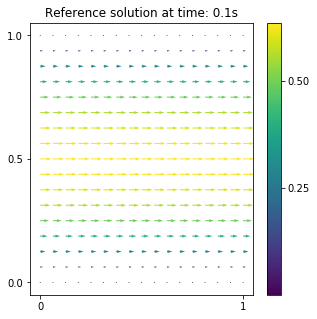

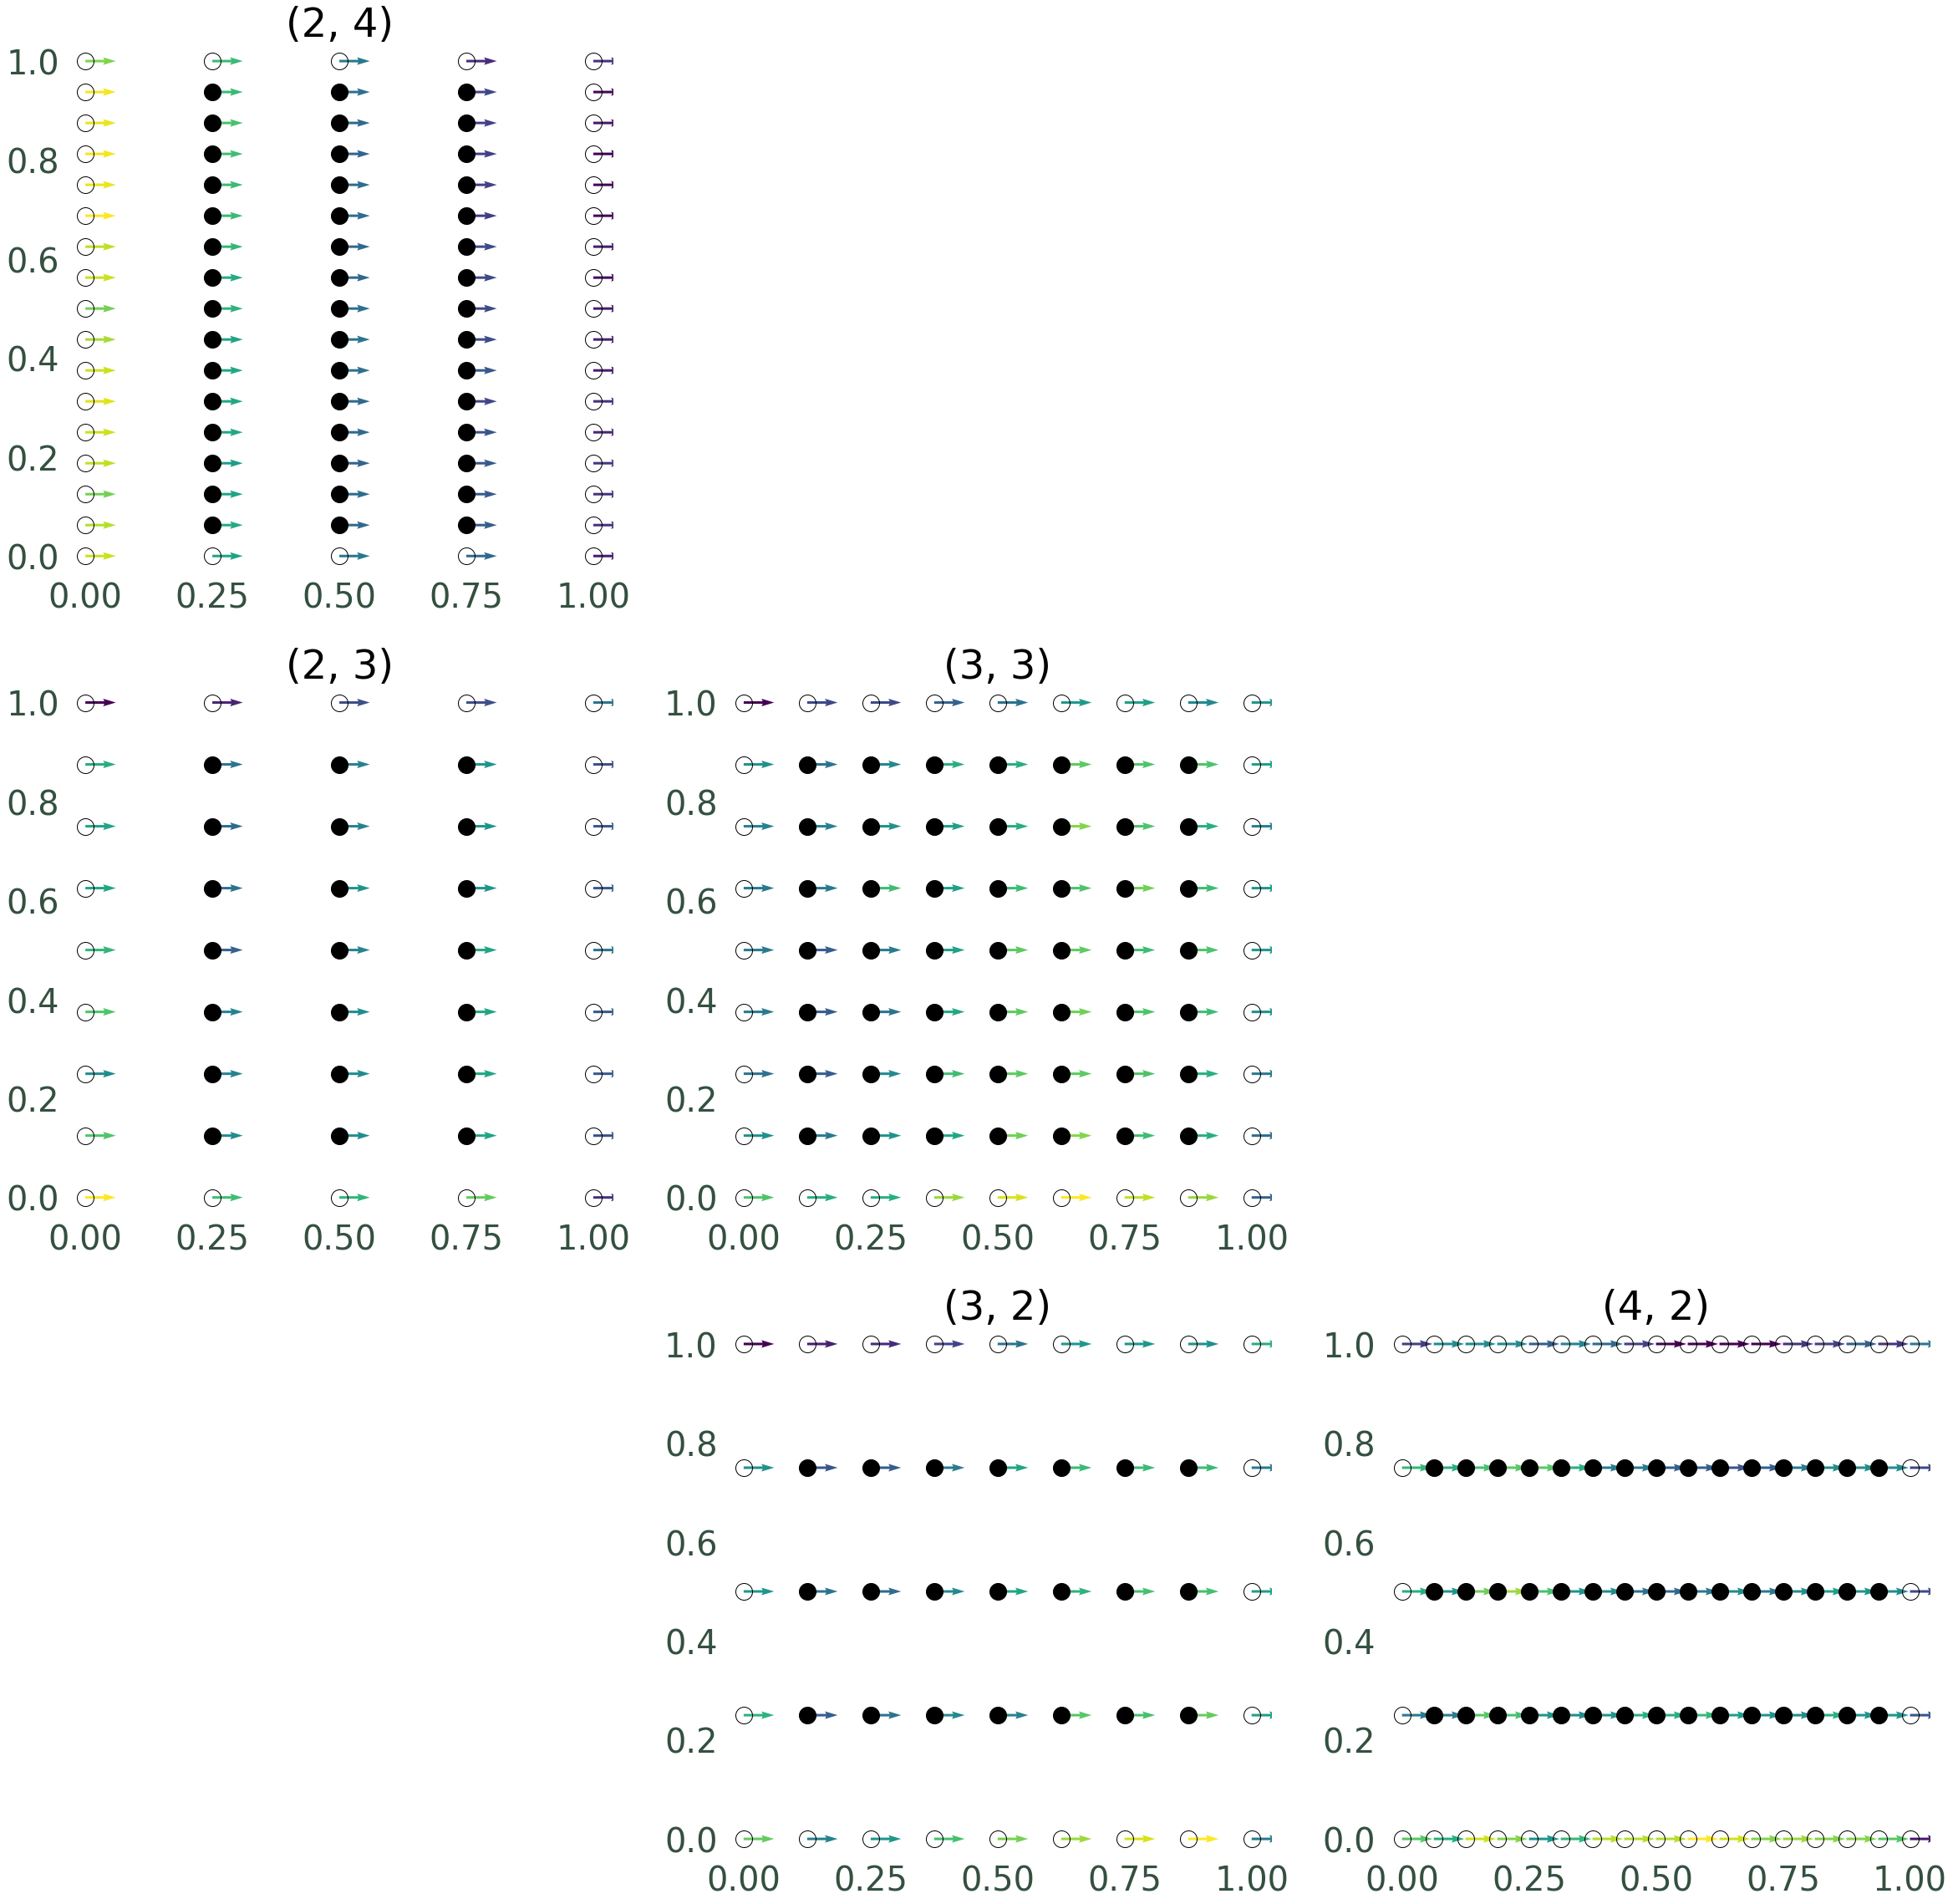

Sparse Grid:
Combi result:
Relative error:


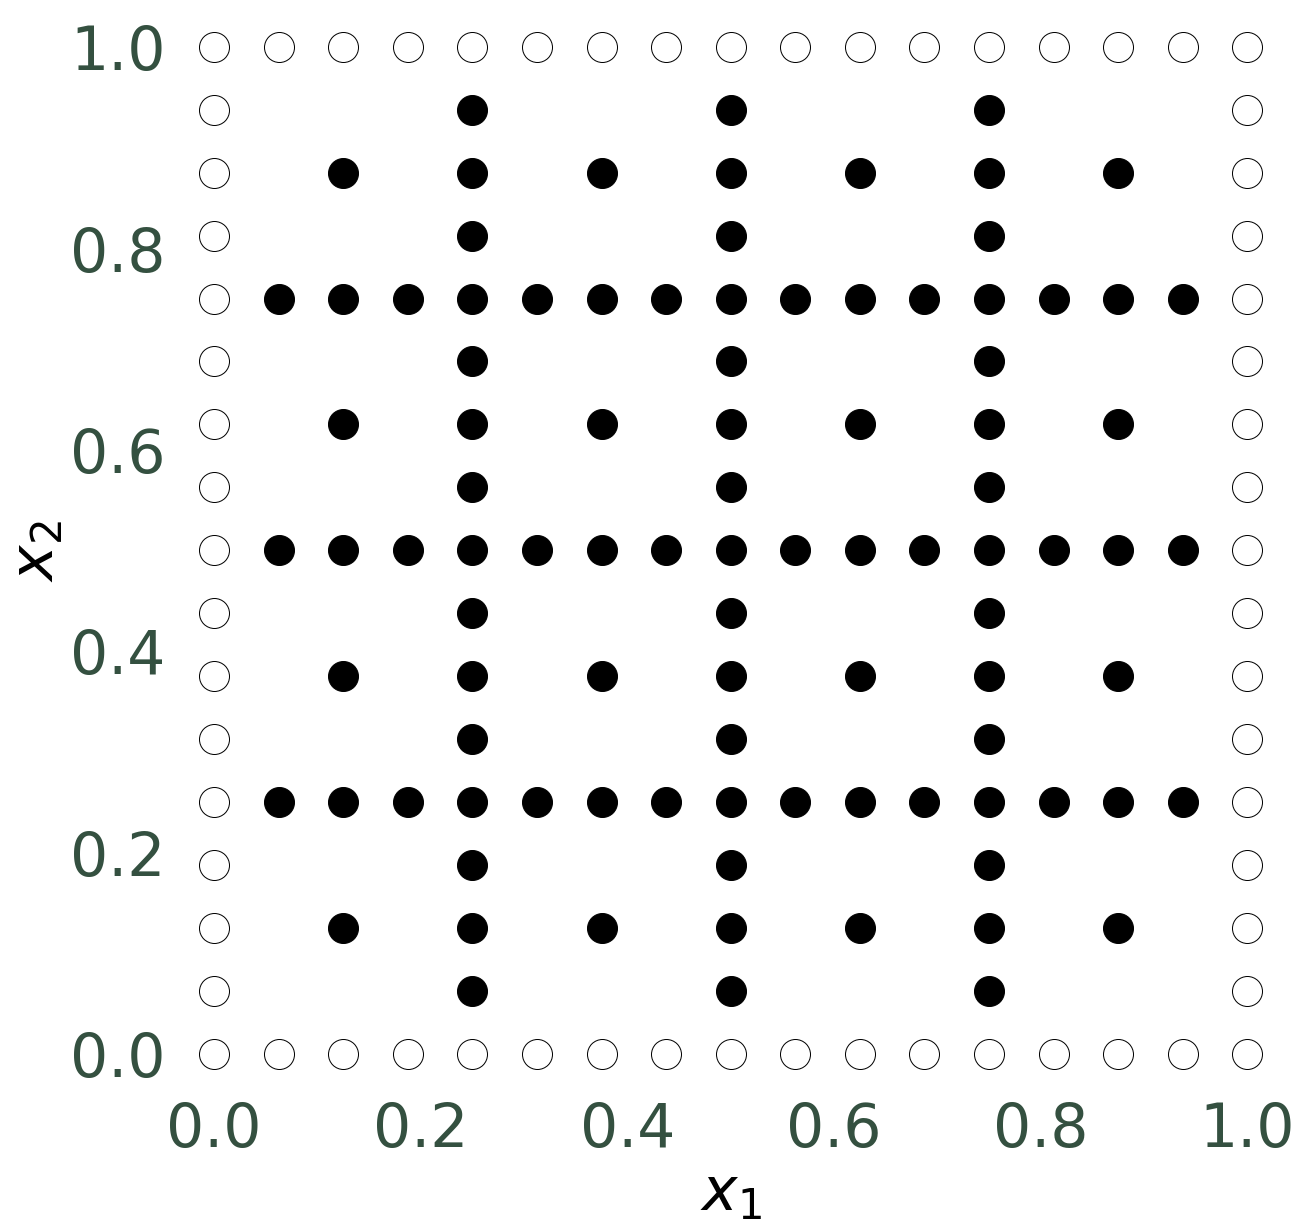

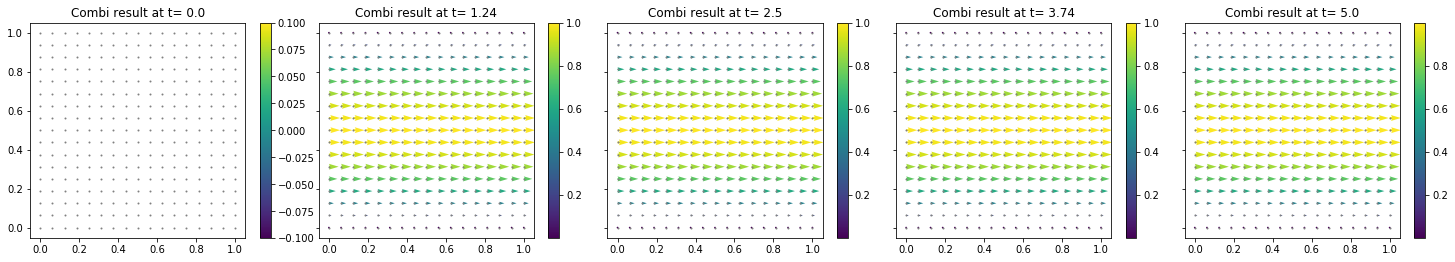

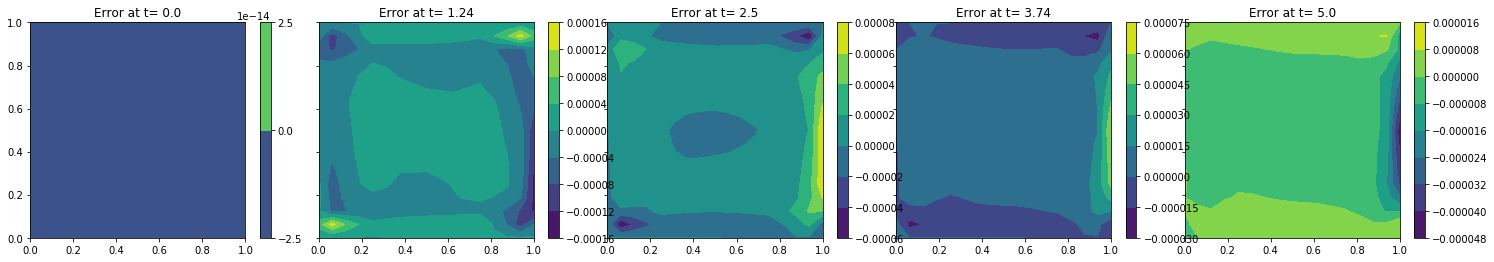

In [2]:
%matplotlib inline
from sys import path
path.append('../src/')
path.append('../PDE')

from fenics import *
import matplotlib.pyplot as plt
import numpy as np

from StandardCombi import *
from GridOperation import *
from ComponentGridInfo import *
from PDE_Solver import *

dim = 2
# a=np.zeros(2)
a = np.zeros(dim)
b = np.ones(dim)
grid = TrapezoidalGrid(a=a, b=b, boundary=True)

# Grid setup
minimum_level = 2
maximum_level = 4
maxlv = tuple(maximum_level*np.ones(dim, dtype=int))
grid.setCurrentArea(a,b,maxlv)

# Solver setup
dt=0.02
t_max=5
navierStokes = Navier_Stokes(t_max=t_max, dt=dt) #default values
# navierStokes.define_mesh_from_points([[0,0.5,1, 1.5, 2],[0,0.02,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95,0.98,1]])
navierStokes.define_rectangle_mesh(a,b, *(len(n) for n in grid.get_coordinates()))
reference_solution = navierStokes.solve()
# PLot reference solution for time t
t=0.1
fig, ax = plt.subplots(figsize=(5,5))
ax.set_title('Reference solution at time: {}s'.format(t))
X,Y = np.meshgrid(*grid.coordinate_array)
U, V = reference_solution[int(t/dt)]
M = np.hypot(U, V) # Given the “legs” of a right triangle, return its hypotenuse.
cf = ax.quiver(X, Y, U, V, M, units='x', width=0.005)
plt.colorbar(cf)

# Combi setup and solution
operation = PDE_Solve(solver=navierStokes, grid=grid, dim=dim, reference_solution=reference_solution)
combiObject = StandardCombi(a, b, operation=operation, print_output=False)
__,__, combi_result = combiObject.perform_operation(minimum_level, maximum_level)

#Results
print("Combi scheme:")
combiObject.print_resulting_combi_scheme(operation=operation)
print("Sparse Grid:")
combiObject.print_resulting_sparsegrid(show_fig=False)
print("Combi result:")
operation.plot_combi_solution(snapshots=5)
print("Relative error:")
operation.plot_error(snapshots=5)

# Dimension Adaptive Combination Technique

It is similar to the Standard Combination Technique except now, a treshold on relative error needs to be specified and the scheme will be adapted until the specified criteria is met.

## 2D Poisson - TO DO
